In [8]:
!pip uninstall opencv-contrib-python -y
!pip uninstall opencv-contrib_python-headless -y
!pip uninstall opencv-python -y
!pip uninstall opencv-python-headless -y
!pip uninstall openpyxl -y

Found existing installation: opencv-contrib-python 4.7.0.72
Uninstalling opencv-contrib-python-4.7.0.72:
  Successfully uninstalled opencv-contrib-python-4.7.0.72
Found existing installation: opencv-contrib-python-headless 4.7.0.72
Uninstalling opencv-contrib-python-headless-4.7.0.72:
  Successfully uninstalled opencv-contrib-python-headless-4.7.0.72
Found existing installation: opencv-python 4.7.0.72
Uninstalling opencv-python-4.7.0.72:
  Successfully uninstalled opencv-python-4.7.0.72


ERROR: Exception:
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\pip\_internal\cli\base_command.py", line 167, in exc_logging_wrapper
    status = run_func(*args)
  File "C:\ProgramData\Anaconda3\lib\site-packages\pip\_internal\commands\uninstall.py", line 103, in run
    uninstall_pathset.commit()
  File "C:\ProgramData\Anaconda3\lib\site-packages\pip\_internal\req\req_uninstall.py", line 424, in commit
    self._moved_paths.commit()
  File "C:\ProgramData\Anaconda3\lib\site-packages\pip\_internal\req\req_uninstall.py", line 277, in commit
    save_dir.cleanup()
  File "C:\ProgramData\Anaconda3\lib\site-packages\pip\_internal\utils\temp_dir.py", line 173, in cleanup
    rmtree(self._path)
  File "C:\ProgramData\Anaconda3\lib\site-packages\pip\_vendor\tenacity\__init__.py", line 326, in wrapped_f
    return self(f, *args, **kw)
  File "C:\ProgramData\Anaconda3\lib\site-packages\pip\_vendor\tenacity\__init__.py", line 406, in __call__
    do = self

Found existing installation: opencv-python-headless 4.7.0.72
Uninstalling opencv-python-headless-4.7.0.72:
  Successfully uninstalled opencv-python-headless-4.7.0.72


Found existing installation: openpyxl 3.0.10
Uninstalling openpyxl-3.0.10:
  Successfully uninstalled openpyxl-3.0.10


In [9]:
!pip list --local

Package                       Version
----------------------------- --------------------
absl-py                       1.4.0
alabaster                     0.7.12
anaconda-client               1.11.0
anaconda-navigator            2.4.0
anaconda-project              0.11.1
anyio                         3.5.0
appdirs                       1.4.4
argon2-cffi                   21.3.0
argon2-cffi-bindings          21.2.0
arrow                         1.2.2
astroid                       2.11.7
astropy                       5.1
astunparse                    1.6.3
atomicwrites                  1.4.0
attrs                         21.4.0
Automat                       20.2.0
autopep8                      1.6.0
Babel                         2.9.1
backcall                      0.2.0
backports.functools-lru-cache 1.6.4
backports.tempfile            1.0
backports.weakref             1.0.post1
bcrypt                        3.2.0
beautifulsoup4                4.11.1
binaryornot                   0.4.4
bi

In [ ]:
!pip install opencv-contrib-python==4.7.0.72
!pip install packing==23

In [1]:
from PIL import Image
import cv2
import numpy as np


In [2]:
import zipfile
path = 'NT.zip'  
zip_object = zipfile.ZipFile(file=path, mode='r')
zip_object.extractall('./')
zip_object.close()

In [3]:
def get_image_data():
  paths = [os.path.join('C:/Users/tyuga/Documents/education/SPbPU/Software Development Technologies/week9/2-Face Recognition/NT', f) for f in os.listdir('C:/Users/tyuga/Documents/education/SPbPU/Software Development Technologies/week9/2-Face Recognition/NT')] #SAME PATH
  faces = []
  ids = []
  for path in paths:
    image = Image.open(path).convert('L')
    image_np = np.array(image, 'uint8')
    id = int(path.split('.')[1])
    
    ids.append(id)
    faces.append(image_np)
  
  return np.array(ids), faces

In [4]:
import os
ids, faces = get_image_data()

In [5]:
lbph_classifier = cv2.face.LBPHFaceRecognizer_create() # make gray scale selfies  (approximately 40)
lbph_classifier.train(faces, ids)
lbph_classifier.write('C:/Users/tyuga/Documents/education/SPbPU/Software Development Technologies/week9/2-Face Recognition/lbph_classifierOG100.yml')  #HERE I WRITE A CLASSIFIER, YOU CAN SEND YOUR PICTURES AND MAKE YOUR OWN CLASSIFIER

In [6]:
lbph_face_classifier = cv2.face.LBPHFaceRecognizer_create()
lbph_face_classifier.read('C:/Users/tyuga/Documents/education/SPbPU/Software Development Technologies/week9/2-Face Recognition/lbph_classifierOG100.yml')

In [7]:
image = Image.open('C:/Users/tyuga/Documents/education/SPbPU/Software Development Technologies/week9/2-Face Recognition/NT/person.2.1.jpg')
image.size

(2316, 3088)

In [8]:
paths = [os.path.join('C:/Users/tyuga/Documents/education/SPbPU/Software Development Technologies/week9/2-Face Recognition/NT/', f) for f in os.listdir('C:/Users/tyuga/Documents/education/SPbPU/Software Development Technologies/week9/2-Face Recognition/NT/')]
for path in paths:
  image = Image.open(path).convert('L')
  image_np = np.array(image, 'uint8')
  prediction, _ = lbph_face_classifier.predict(image_np)
  expected_output = int(path.split('.')[1])

  cv2.putText(image_np, 'Pred: ' + str(prediction), (10,30), cv2.FONT_HERSHEY_COMPLEX_SMALL, 1, (0,255,0))
  cv2.putText(image_np, 'Exp: ' + str(expected_output), (10,50), cv2.FONT_HERSHEY_COMPLEX_SMALL, 1, (0,255,0))


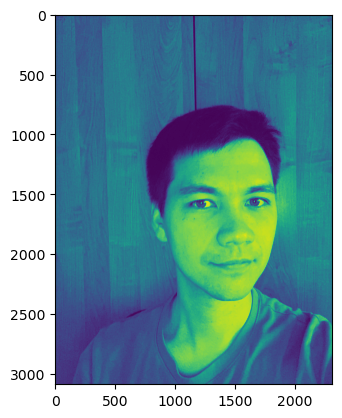

In [9]:
import matplotlib.pyplot as plt
plt.imshow(image_np)
plt.show()